# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
#from api_keys import weather_api_key

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

         # Append the data to the city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | winnemucca
Processing Record 4 of Set 1 | linghai
Processing Record 5 of Set 1 | ulsteinvik
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | san fernando de apure
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | margate
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | sabha
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | kitimat
Processing Record 18 of Set 1 | mukah
City not found. Skipping...
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | jamestown
Process

Processing Record 37 of Set 4 | ozark
Processing Record 38 of Set 4 | ola
Processing Record 39 of Set 4 | hoxtolgay
City not found. Skipping...
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | masumbwe
Processing Record 44 of Set 4 | kununurra
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | yanchep
Processing Record 47 of Set 4 | patterson
Processing Record 48 of Set 4 | gudermes
Processing Record 49 of Set 4 | palkonda
Processing Record 0 of Set 5 | laguna
Processing Record 1 of Set 5 | ahvaz
Processing Record 2 of Set 5 | rikaze
Processing Record 3 of Set 5 | polyarnyy
Processing Record 4 of Set 5 | weligama
Processing Record 5 of Set 5 | campo grande
Processing Record 6 of Set 5 | noumea
Processing Record 7 of Set 5 | lira
Processing Record 8 of Set 5 | mae hong son
Processing Record 9 of Set 5 | tanrake village
City not found. Skipping...
P

Processing Record 28 of Set 8 | st. john's
Processing Record 29 of Set 8 | kutum
Processing Record 30 of Set 8 | grahamstown
Processing Record 31 of Set 8 | shelbyville
Processing Record 32 of Set 8 | suntar
Processing Record 33 of Set 8 | piti village
Processing Record 34 of Set 8 | ilagan
Processing Record 35 of Set 8 | salekhard
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | lebu
Processing Record 38 of Set 8 | whitley bay
Processing Record 39 of Set 8 | san andres
Processing Record 40 of Set 8 | elverum
Processing Record 41 of Set 8 | tubmanburg
Processing Record 42 of Set 8 | dul'durga
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | vorkuta
Processing Record 45 of Set 8 | christchurch
Processing Record 46 of Set 8 | ataq
Processing Record 47 of Set 8 | verkhniy baskunchak
Processing Record 48 of Set 8 | boyolangu
Processing Record 49 of Set 8 | totness
Processing Record 0 of Set 9 | nizao
Processing Record 1 of Set 9 | bardai

Processing Record 19 of Set 12 | ishigaki
Processing Record 20 of Set 12 | lhokseumawe
Processing Record 21 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 22 of Set 12 | maykop
Processing Record 23 of Set 12 | minas de marcona
Processing Record 24 of Set 12 | tartouss
Processing Record 25 of Set 12 | mandiana
Processing Record 26 of Set 12 | vilyuysk
Processing Record 27 of Set 12 | vryheid
Processing Record 28 of Set 12 | bredy
Processing Record 29 of Set 12 | ilha de mocambique
Processing Record 30 of Set 12 | lago da pedra
Processing Record 31 of Set 12 | divnomorskoye
Processing Record 32 of Set 12 | pithiviers
Processing Record 33 of Set 12 | marlborough
Processing Record 34 of Set 12 | prince rupert
Processing Record 35 of Set 12 | kokopo
Processing Record 36 of Set 12 | vrede
Processing Record 37 of Set 12 | inderbor
Processing Record 38 of Set 12 | afif
Processing Record 39 of Set 12 | batyrevo
Processing Record 40 of Set 12 | velikiye luki
Processing Reco

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,17.15,75,89,1.70,RU,1719655797
1,georgetown,5.4112,100.3354,31.96,70,20,3.09,MY,1719655791
2,winnemucca,40.9730,-117.7357,19.03,32,0,6.17,US,1719655803
3,linghai,41.1653,121.3667,25.89,64,100,4.79,CN,1719655805
4,ulsteinvik,62.3432,5.8487,15.42,81,94,8.05,NO,1719655807


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_ZR/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data_ZR/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,17.15,75,89,1.70,RU,1719655797
1,georgetown,5.4112,100.3354,31.96,70,20,3.09,MY,1719655791
2,winnemucca,40.9730,-117.7357,19.03,32,0,6.17,US,1719655803
3,linghai,41.1653,121.3667,25.89,64,100,4.79,CN,1719655805
4,ulsteinvik,62.3432,5.8487,15.42,81,94,8.05,NO,1719655807


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

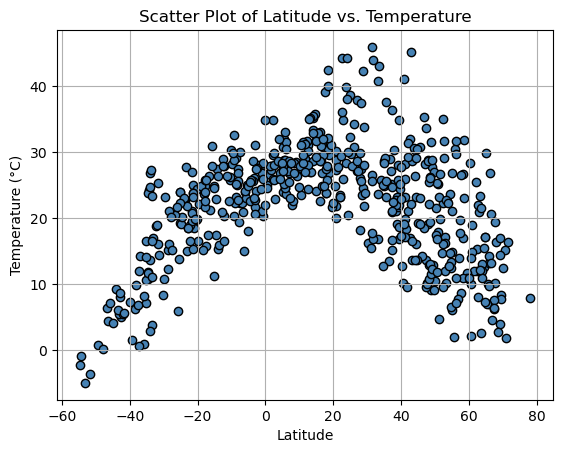

In [36]:
# Build scatter plot for latitude vs. temperature

# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,color='steelblue',edgecolors='black', marker='o' )


# Add title and labels
plt.title("Scatter Plot of Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")

# Show the plot
plt.grid(True)


# Save the figure
plt.savefig("output_data_ZR/Figt1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

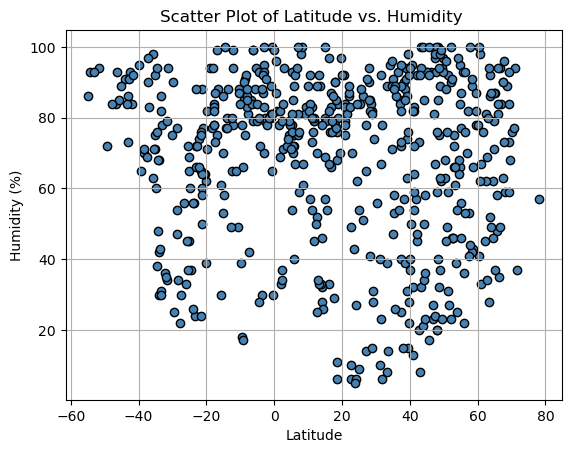

In [37]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,color='steelblue',edgecolors='black', marker='o' )

# Add title and labels
plt.title("Scatter Plot of Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show the plot
plt.grid(True)


# Save the figure
plt.savefig("output_data_ZR/Figt2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

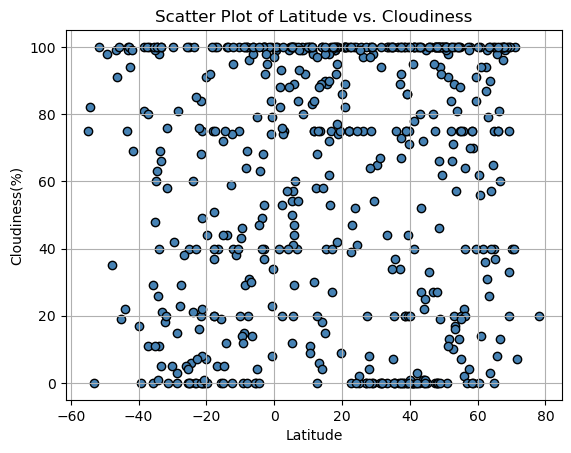

In [38]:
# Build the scatter plots for latitude vs. cloudiness

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,color='steelblue',edgecolors='black', marker='o' )

# Add title and labels
plt.title("Scatter Plot of Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Show the plot
plt.grid(True)



# Save the figure
plt.savefig("output_data_ZR/Figtt3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

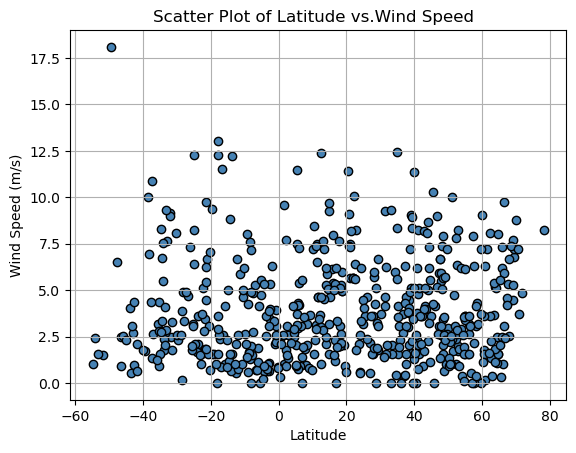

In [39]:
# Build the scatter plots for latitude vs. wind speed

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,color='steelblue',edgecolors='black', marker='o' )


# Add title and labels
plt.title("Scatter Plot of Latitude vs.Wind Speed  ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Show the plot
plt.grid(True)


# Save the figure
plt.savefig("output_data_ZR/Figt4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

from scipy import stats

def plot_linear_regression(x_values, y_values, x_label, y_label, title):

    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12, color="red", 
                 verticalalignment='top')
    plt.title(title)
    
    
    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")

    # Show plot
    plt.show()


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]

northern_hemisphere_df = pd.DataFrame(northern_hemisphere)


# Display sample data
northern_hemisphere_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,17.15,75,89,1.70,RU,1719655797
1,georgetown,5.4112,100.3354,31.96,70,20,3.09,MY,1719655791
2,winnemucca,40.9730,-117.7357,19.03,32,0,6.17,US,1719655803
3,linghai,41.1653,121.3667,25.89,64,100,4.79,CN,1719655805
4,ulsteinvik,62.3432,5.8487,15.42,81,94,8.05,NO,1719655807


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Sourthern_hemisphere = city_data_df[city_data_df["Lat"] < 0]

Southern_hemisphere_df = pd.DataFrame(Sourthern_hemisphere)



# Display sample data
Southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,waitangi,-43.9535,-176.5597,9.34,91,22,4.02,NZ,1719655815
10,blackmans bay,-43.0167,147.3167,8.07,73,100,2.68,AU,1719655823
11,uturoa,-16.7333,-151.4333,26.48,75,5,11.51,PF,1719655826
12,codrington,-38.2667,141.9667,9.83,70,81,6.93,AU,1719655831
14,puerto natales,-51.7236,-72.4875,-3.65,94,100,1.53,CL,1719655836


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3736713240358968


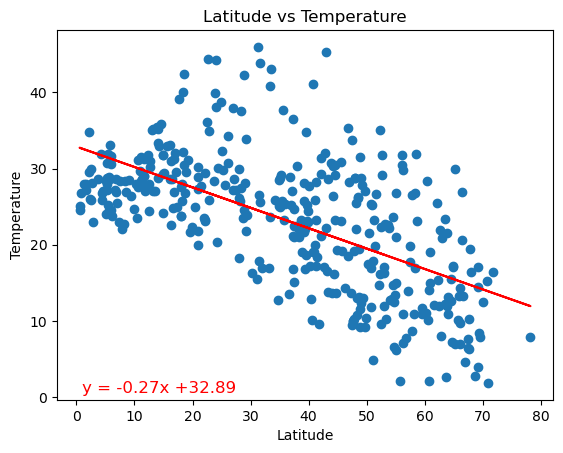

In [43]:
# Linear regression on Northern Hemisphere
# Perform a linear regression on temperature vs. latitude

plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], 
                       "Latitude", "Temperature", "Latitude vs Temperature")


The r^2-value is: 0.6207883004706279


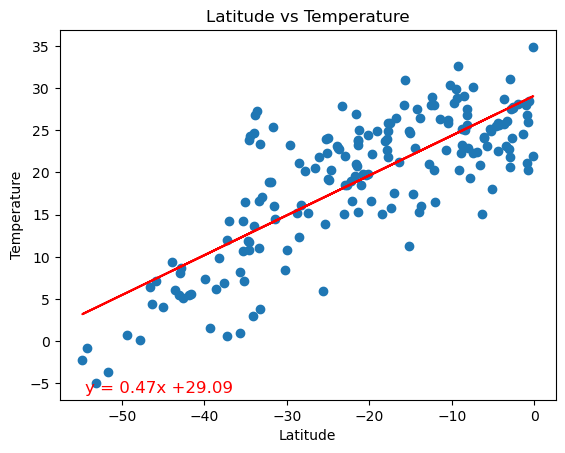

In [45]:
# Linear regression on Southern Hemisphere
plot_linear_regression(Southern_hemisphere_df["Lat"], Southern_hemisphere_df["Max Temp"], 
                       "Latitude", "Temperature", "Latitude vs Temperature")


**Discussion about the linear relationship:**  
•	The Northern Hemisphere shows a moderate negative correlation between latitude and temperature, with latitude explaining about 37% of the temperature variation.
•	The Southern Hemisphere exhibits a stronger positive correlation, with latitude explaining about 62.1% of the temperature variation.
•	The stronger r2-value in the Southern Hemisphere suggests that latitude has a more substantial impact on temperature changes in the Southern Hemisphere compared to the Northern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0013003492164848146


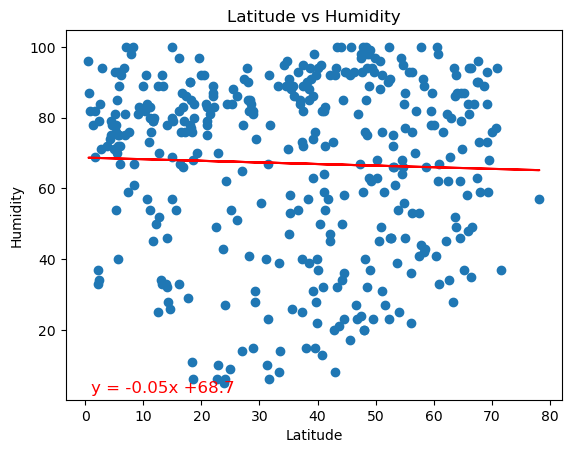

In [44]:
# Northern Hemisphere
x_values= northern_hemisphere_df["Lat"]  
y_values= northern_hemisphere_df["Humidity"]  

plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], 
                       "Latitude", "Humidity", "Latitude vs Humidity")

The r^2-value is: 0.005094206347351313


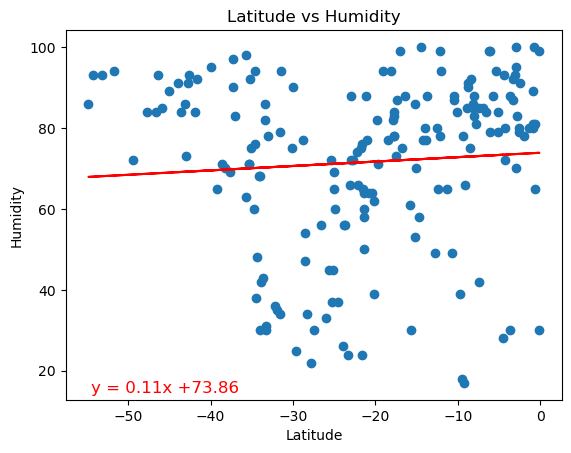

In [46]:
# Southern Hemisphere

plot_linear_regression(Southern_hemisphere_df["Lat"], 
                       Southern_hemisphere_df["Humidity"], "Latitude", "Humidity", "Latitude vs Humidity")



**Discussion about the linear relationship:** 
For Northern hemisphere the slope of −0.05 suggests a minimal decrease in humidity with increasing latitude whereas for southern hemisphere   the slope of 0.11 suggests a slight increase in humidity with increasing latitude.
Both hemispheres exhibit very weak correlations between latitude and humidity. The r2 values are extremely low (0.0013 for the Northern Hemisphere and 0.0051 for the Southern Hemisphere), indicating that latitude is not a significant predictor of humidity. Other environmental or geographic factors likely have a much greater influence on humidity levels.


### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.010711140601378179


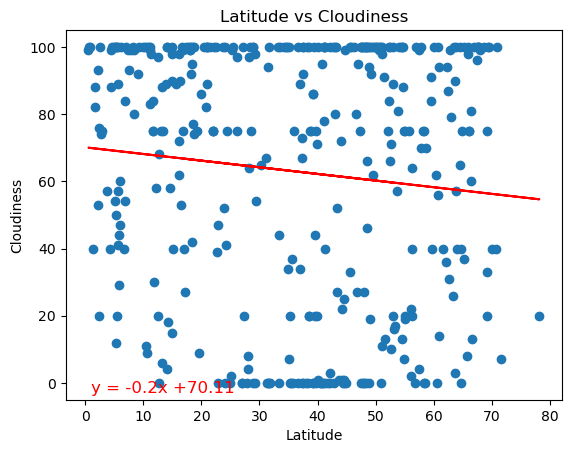

In [47]:
# Northern Hemisphere

plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], 
                       "Latitude", "Cloudiness", "Latitude vs Cloudiness")




The r^2-value is: 0.0002014787632106666


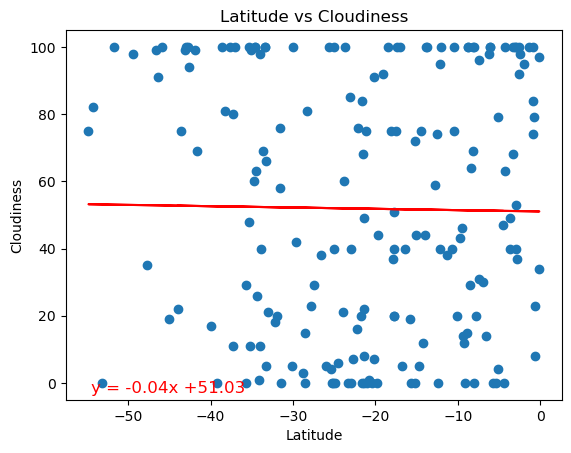

In [48]:
# Southern Hemisphere
plot_linear_regression(Southern_hemisphere_df["Lat"], 
                       Southern_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness", "Latitude vs Cloudiness")
    


**Discussion about the linear relationship:** 
For Northern Hemisphere, the slope of −0.2 suggests a slight decrease in cloudiness with increasing latitude. The very low r2-value (0.0107) indicates that latitude explains only 1.07% of the variation in cloudiness. 

For Southern Hemisphere, the slope of −0.04 suggests a minimal decrease in cloudiness with increasing latitude. The extremely low r2 value (0.0002) indicates that latitude explains only 0.02% of the variation in cloudiness. 

In both hemispheres, the r2-values are extremely low, indicating that latitude is not a significant predictor of cloudiness. Other environmental or geographic factors likely have a much greater impact on cloudiness levels.


In [ ]:
### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 5.613368934806897e-05


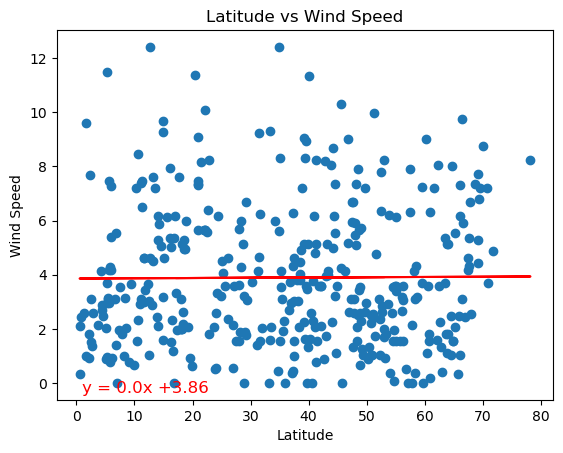

In [49]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], 
                       "Latitude", "Wind Speed", "Latitude vs Wind Speed")


The r^2-value is: 0.016452200069893317


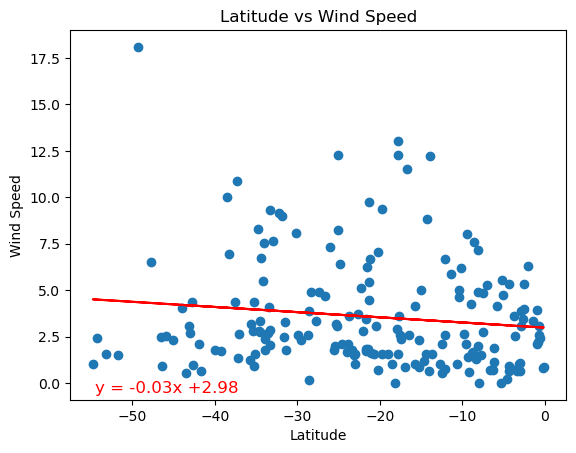

In [50]:
# Southern Hemisphere

plot_linear_regression(Southern_hemisphere_df["Lat"], 
                       Southern_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed", "Latitude vs Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear regression equation, 
Northern Hemisphere shows no correlation between latitude and wind speed. The r2 -value of 0.000056 indicates that latitude explains almost none of the variation in wind speed. The slope of 00 suggests that wind speed remains constant across different latitudes.
Southern Hemisphere shows a very weak negative correlation between latitude and wind speed. The r2 -value of 0.0165 indicates that latitude explains only 1.65% of the variation in wind speed. The slope of −0.3 suggests a slight decrease in wind speed with increasing latitude, but this relationship is very weak.
In both hemispheres, the r2 -values are extremely low, indicating that latitude is not a significant predictor of wind speed. Other environmental or geographic factors likely have a much larger impact on wind speed levels.




